<a href="https://colab.research.google.com/github/ro-nny-nag/googlecolab_notebooks/blob/main/21BDS0329_final_merge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

21BDS0329
Naguri Ronith Reddy

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
# Load the dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/indian_food.csv"
df = pd.read_csv(url)

# Load an additional dataset to merge (example: another CSV with additional food details)
url_additional = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/indian_food.csv"
df_additional = pd.read_csv(url_additional)

# Display first few rows
print("Original Data:")
print(df.head())

Original Data:
             name                                        ingredients  \
0      Balu shahi                    Maida flour, yogurt, oil, sugar   
1          Boondi                            Gram flour, ghee, sugar   
2  Gajar ka halwa       Carrots, milk, sugar, ghee, cashews, raisins   
3          Ghevar  Flour, ghee, kewra, milk, clarified butter, su...   
4     Gulab jamun  Milk powder, plain flour, baking powder, ghee,...   

         diet  prep_time  cook_time flavor_profile   course        state  \
0  vegetarian         45         25          sweet  dessert  West Bengal   
1  vegetarian         80         30          sweet  dessert    Rajasthan   
2  vegetarian         15         60          sweet  dessert       Punjab   
3  vegetarian         15         30          sweet  dessert    Rajasthan   
4  vegetarian         15         40          sweet  dessert  West Bengal   

  region  
0   East  
1   West  
2  North  
3   West  
4   East  


In [ ]:
# Drop duplicate rows
df = df.drop_duplicates()

# Fill missing values with appropriate values
df.fillna({"state": "Unknown", "diet": "Unknown"}, inplace=True)

# Convert columns to lowercase
df.columns = df.columns.str.lower()
df_additional.columns = df_additional.columns.str.lower()

# Remove leading/trailing spaces in string columns
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df_additional = df_additional.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Convert preparation_time and cook_time to integers (replace 'NA' with 0)
df['prep_time'] = pd.to_numeric(df['prep_time'], errors='coerce').fillna(0).astype(int)
df['cook_time'] = pd.to_numeric(df['cook_time'], errors='coerce').fillna(0).astype(int)

# Add a new column for total cooking time
df['total_time'] = df['prep_time'] + df['cook_time']

# Standardize diet column (e.g., Veg / Non-Veg)
df['diet'] = df['diet'].str.capitalize()

# Concatenate 'name' and 'state' columns into a new column 'dish_location'
df['dish_location'] = df['name'] + " - " + df['course']

# Save transformed data to CSV
df.to_csv("transformed_indian_food.csv", index=False)

# Display transformed data
print("\nTransformed Data:")
print(df.head())


Transformed Data:
             name                                        ingredients  \
0      Balu shahi                    Maida flour, yogurt, oil, sugar   
1          Boondi                            Gram flour, ghee, sugar   
2  Gajar ka halwa       Carrots, milk, sugar, ghee, cashews, raisins   
3          Ghevar  Flour, ghee, kewra, milk, clarified butter, su...   
4     Gulab jamun  Milk powder, plain flour, baking powder, ghee,...   

         diet  prep_time  cook_time flavor_profile   course        state  \
0  Vegetarian         45         25          sweet  dessert  West Bengal   
1  Vegetarian         80         30          sweet  dessert    Rajasthan   
2  Vegetarian         15         60          sweet  dessert       Punjab   
3  Vegetarian         15         30          sweet  dessert    Rajasthan   
4  Vegetarian         15         40          sweet  dessert  West Bengal   

  region  total_time             dish_location  
0   East          70      Balu shahi - des

In [ ]:
# Merge with additional dataset on 'name' column
df_merged = pd.merge(df, df_additional, on='name', how='left')

# Save transformed data to CSV
df_merged.to_csv("transformed_indian_food.csv", index=False)

# Display transformed data
print("\nTransformed Data:")
print(df_merged.head())


Transformed Data:
             name                                      ingredients_x  \
0      Balu shahi                    Maida flour, yogurt, oil, sugar   
1          Boondi                            Gram flour, ghee, sugar   
2  Gajar ka halwa       Carrots, milk, sugar, ghee, cashews, raisins   
3          Ghevar  Flour, ghee, kewra, milk, clarified butter, su...   
4     Gulab jamun  Milk powder, plain flour, baking powder, ghee,...   

       diet_x  prep_time_x  cook_time_x flavor_profile_x course_x  \
0  Vegetarian           45           25            sweet  dessert   
1  Vegetarian           80           30            sweet  dessert   
2  Vegetarian           15           60            sweet  dessert   
3  Vegetarian           15           30            sweet  dessert   
4  Vegetarian           15           40            sweet  dessert   

       state_x region_x  total_time             dish_location  \
0  West Bengal     East          70      Balu shahi - dessert   
1  

In [ ]:
df['state'].value_counts()

,count
state,
Gujarat,35
Punjab,32
Maharashtra,30
West Bengal,24
-1,24
Assam,21
Tamil Nadu,20
Andhra Pradesh,10
Uttar Pradesh,9


In [ ]:
df.describe()

,prep_time,cook_time,total_time
count,255.000000,255.000000,255.000000
mean,31.105882,34.529412,65.635294
std,72.554409,48.265650,92.752636
min,-1.000000,-1.000000,-2.000000
25%,10.000000,20.000000,30.000000
50%,10.000000,30.000000,50.000000
75%,20.000000,40.000000,60.000000
max,500.000000,720.000000,730.000000


In [ ]:
# Selecting relevant columns
df_subset = df[['name', 'prep_time', 'cook_time', 'region']]

# Creating a hierarchical index with 'region' as the first level and 'name' as the second
df_subset.set_index(['region', 'name'], inplace=True)

# Display the reshaped DataFrame
print(df_subset.head())

                       prep_time  cook_time
region name                                
East   Balu shahi             45         25
West   Boondi                 80         30
North  Gajar ka halwa         15         60
West   Ghevar                 15         30
East   Gulab jamun            15         40


In [ ]:
stacked = df_subset.stack()
stacked

region   name                     
East     Balu shahi      prep_time    45
                         cook_time    25
West     Boondi          prep_time    80
                         cook_time    30
North    Gajar ka halwa  prep_time    15
                                      ..
         Shufta          cook_time    -1
Central  Mawa Bati       prep_time    20
                         cook_time    45
West     Pinaca          prep_time    -1
                         cook_time    -1
Length: 510, dtype: int64

In [ ]:
stacked.unstack()

prep_time  cook_time
region name                                           
NaN    Panjeeri                          10         25
       Tandoori Chicken                 240         30
-1     Brown Rice                        15         25
       Kaju katli                        10         20
       Kheer                             10         40
...                                     ...        ...
West   Turiya Patra Vatana sabji         35         40
       Undhiyu                           25         60
       Veg Kolhapuri                     20         30
       Vindaloo                          10         40
       Zunka                             10         25

[255 rows x 2 columns]

In [ ]:
# Creating two Series: one for prep_time and one for cook_time
series_prep = df.set_index('name')['prep_time']
series_cook = df.set_index('name')['cook_time']

# Concatenating them with hierarchical indexing
frame_combined = pd.concat([series_prep, series_cook], keys=['Prep Time', 'Cook Time'])

# Unstacking the DataFrame
result_unstacked = frame_combined.unstack()

# Display the transformed DataFrame
print(result_unstacked.head())


name       Balu shahi  Boondi  Gajar ka halwa  Ghevar  Gulab jamun  Imarti  \
Prep Time          45      80              15      15           15      10   
Cook Time          25      30              60      30           40      50   

name       Jalebi  Kaju katli  Kalakand  Kheer  ...  Pani Pitha  Payokh  \
Prep Time      10          10        20     10  ...          10      -1   
Cook Time      50          20        30     40  ...          20      -1   

name       Prawn malai curry  Red Rice  Shukto  Til Pitha  Bebinca  Shufta  \
Prep Time                 15        -1      10          5       20      -1   
Cook Time                 50        -1      20         30       60      -1   

name       Mawa Bati  Pinaca  
Prep Time         20      -1  
Cook Time         45      -1  

[2 rows x 255 columns]


In [ ]:
# Creating a sample DataFrame similar to the example but using the dataset
frame3 = df[['name', 'prep_time']].copy()

# Introducing some duplicate rows for demonstration
frame3 = pd.concat([frame3, frame3.iloc[:3]], ignore_index=True)

print("Before Deduplication:")
print(frame3.head(10))

# Removing duplicates
frame3_deduplicated = frame3.drop_duplicates()

print("\nAfter Deduplication:")
print(frame3_deduplicated.head(10))

Before Deduplication:
             name  prep_time
0      Balu shahi         45
1          Boondi         80
2  Gajar ka halwa         15
3          Ghevar         15
4     Gulab jamun         15
5          Imarti         10
6          Jalebi         10
7      Kaju katli         10
8        Kalakand         20
9           Kheer         10

After Deduplication:
             name  prep_time
0      Balu shahi         45
1          Boondi         80
2  Gajar ka halwa         15
3          Ghevar         15
4     Gulab jamun         15
5          Imarti         10
6          Jalebi         10
7      Kaju katli         10
8        Kalakand         20
9           Kheer         10


In [ ]:
frame3_deduplicated.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
250,False
251,False
252,False
253,False


In [ ]:
bins = [118, 125, 135, 160, 200]
category = pd.cut(df['cook_time'], bins)
category

,cook_time
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
250,NaN
251,NaN
252,NaN
253,NaN


In [ ]:
pd.value_counts(category)

<ipython-input-43-7a767266afe9>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(category)


,count
cook_time,
"(118, 125]",3
"(125, 135]",0
"(135, 160]",0
"(160, 200]",0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
#2. Load the dataset and Display First and Last 3 rows of the dataset
df = pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/indian_food.csv")
print(df.head(3))
print(df.tail(3))

             name                                   ingredients        diet  \
0      Balu shahi               Maida flour, yogurt, oil, sugar  vegetarian   
1          Boondi                       Gram flour, ghee, sugar  vegetarian   
2  Gajar ka halwa  Carrots, milk, sugar, ghee, cashews, raisins  vegetarian   

   prep_time  cook_time flavor_profile   course        state region  
0         45         25          sweet  dessert  West Bengal   East  
1         80         30          sweet  dessert    Rajasthan   West  
2         15         60          sweet  dessert       Punjab  North  
          name                                        ingredients        diet  \
252     Shufta  Cottage cheese, dry dates, dried rose petals, ...  vegetarian   
253  Mawa Bati  Milk powder, dry fruits, arrowroot powder, all...  vegetarian   
254     Pinaca  Brown rice, fennel seeds, grated coconut, blac...  vegetarian   

     prep_time  cook_time flavor_profile   course            state   region  


In [ ]:
#3. Check the data types of each column
df.dtypes

,0
name,object
ingredients,object
diet,object
prep_time,int64
cook_time,int64
flavor_profile,object
course,object
state,object
region,object


In [ ]:
#5. Find the descriptive Statistics of the entire dataset
print(df.describe())
pd.isna(df).any()

        prep_time   cook_time
count  255.000000  255.000000
mean    31.105882   34.529412
std     72.554409   48.265650
min     -1.000000   -1.000000
25%     10.000000   20.000000
50%     10.000000   30.000000
75%     20.000000   40.000000
max    500.000000  720.000000


,0
name,False
ingredients,False
diet,True
prep_time,False
cook_time,False
flavor_profile,False
course,True
state,False
region,True


In [ ]:
#Setting the missing value to mean of price and convert the datatype to integer
price = df['prep_time'].loc[df['prep_time'] != '?']
print(price)
pmean = price.astype(int).mean()
print("Mean =",pmean)
df['prep_time'] = df['prep_time'].replace('?',pmean).astype(int)
df['prep_time'].head(10)

0      45
1      80
2      15
3      15
4      15
       ..
250     5
251    20
252    -1
253    20
254    -1
Name: prep_time, Length: 255, dtype: int64
Mean = 31.105882352941176


,prep_time
0,45
1,80
2,15
3,15
4,15
5,10
6,10
7,10
8,20
9,10


In [ ]:
# Cleaning the horsepower losses field
horsepower = df['cook_time'].loc[df['cook_time'] != '?']
hpmean = horsepower.astype(int).mean()
df['cook_time'] = df['cook_time'].replace('?',hpmean).astype(int)
df['cook_time'].head()

,cook_time
0,25
1,30
2,60
3,30
4,40


In [ ]:
#6. compute the measure of central tendency of the height column.
#Descriptive Statistics
#Calculate mean, median and mode of dat set height
mean = df["cook_time"].mean()
median =df["cook_time"].median()
mode = df["cook_time"].mode()
print(mean , median, mode)

34.529411764705884 30.0 0    30
Name: cook_time, dtype: int64


Text(0.5, 0, 'Make of the state')

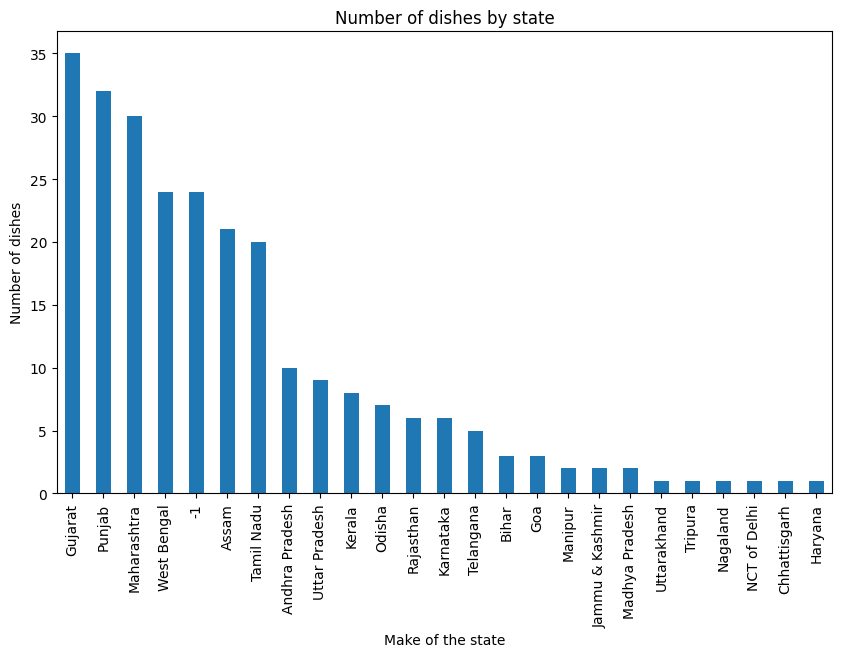

In [ ]:
#7. First 30 largest values and draw a bar chart
df.state.value_counts().nlargest(30).plot(kind='bar', figsize=(10,6))
plt.title("Number of dishes by state")
plt.ylabel('Number of dishes')
plt.xlabel('Make of the state')

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


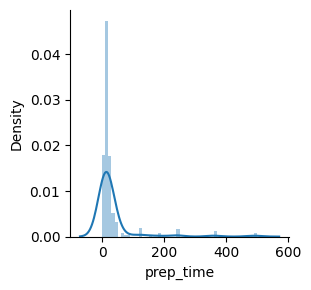

In [ ]:
#8. Distribution plot
sns.FacetGrid(df).map(sns.distplot,"prep_time").add_legend()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


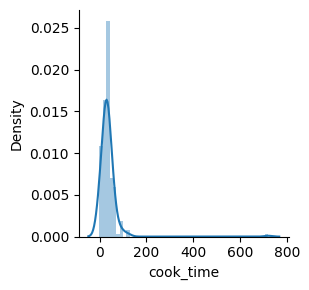

In [ ]:
#distribution plot
sns.FacetGrid(df).map(sns.distplot,"cook_time").add_legend()

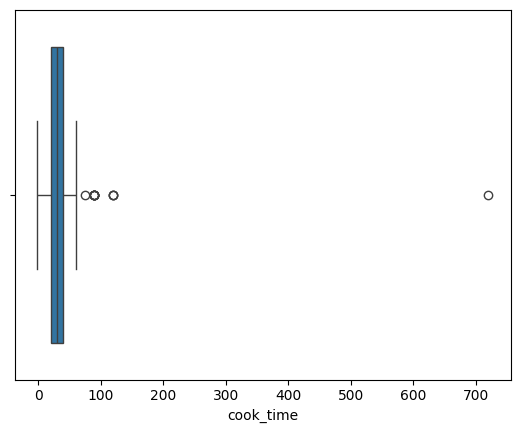

In [ ]:
#boxplot for price of cars
sns.boxplot(x="cook_time",data=df)
plt.show()

Text(0, 0.5, 'prep_time')

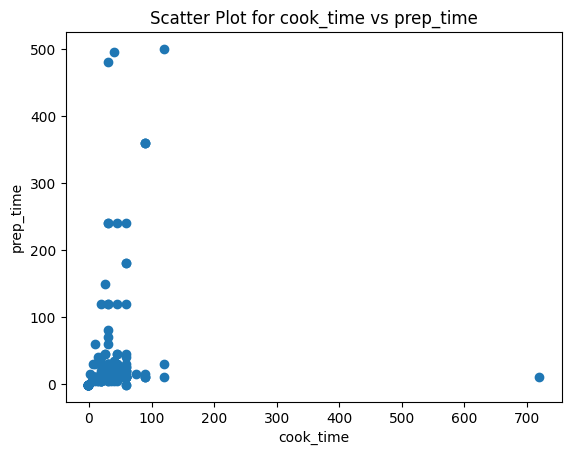

In [ ]:
plt.scatter(df["cook_time"], df["prep_time"])
plt.title("Scatter Plot for cook_time vs prep_time")
plt.xlabel("cook_time")
plt.ylabel("prep_time")

In [ ]:
#Relationshipt between two features (Positive Correlation)
np.corrcoef(df["cook_time"], df["prep_time"])

array([[1.        , 0.14411325],
       [0.14411325, 1.        ]])

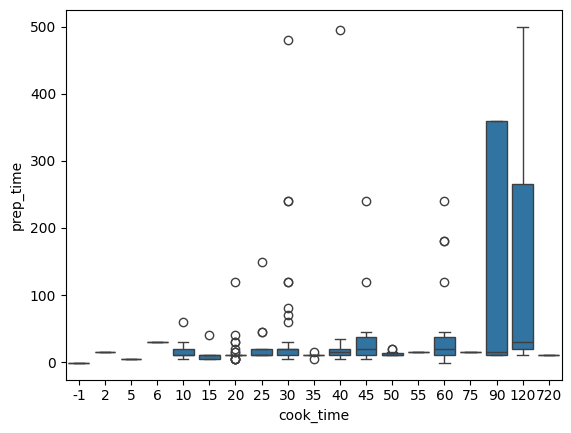

In [ ]:
sns.boxplot(x="cook_time",y="prep_time",data=df)
plt.show()

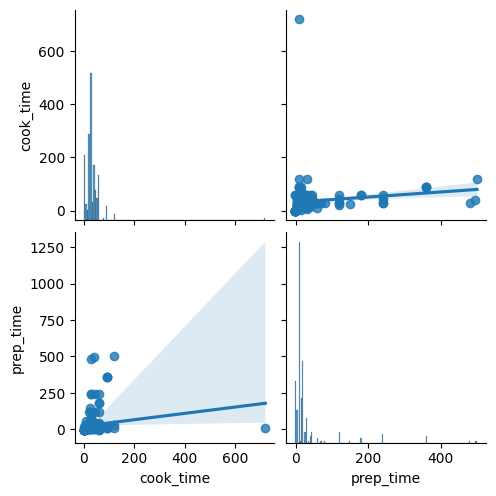

In [ ]:
#1. 1. We can use the scatter_matrix() function from the pandas.tools.plotting package or
# the seaborn.pairplot() function from the seaborn package to do this:
# pair plot with plot type regression

# pair plot with plot type regression
sns.pairplot(df,vars = [ 'cook_time','prep_time'], kind="reg")
plt.show()


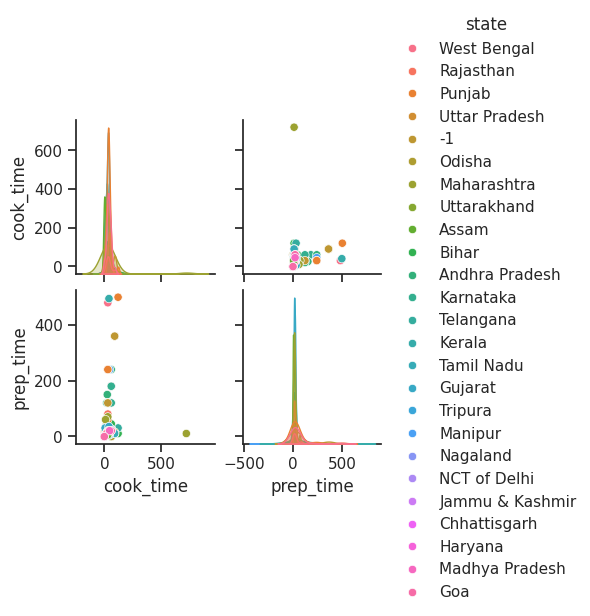

In [ ]:
#2. A pair plot by specifying the colors, labels, plot type, diagonal plot type, and variables.
#pair plot (matrix scatterplot) of few columns
sns.set(style="ticks", color_codes=True)
sns.pairplot(df,height=2,vars = ['cook_time','prep_time'], hue="state")
plt.show()

In [ ]:
#3. To calculate the correlation coefficient for the price and horsepower,
from scipy import stats

corr = stats.pearsonr(df["cook_time"], df["prep_time"])
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

p-value:	 0.02133363269962658
cor:		 0.14411325100222427


In [ ]:
# To find the correlation among the entire numerical records
# the columns using pearson method
correlation = df.corr(method='pearson', numeric_only=True)
correlation

,prep_time,cook_time
prep_time,1.000000,0.144113
cook_time,0.144113,1.000000


<Axes: >

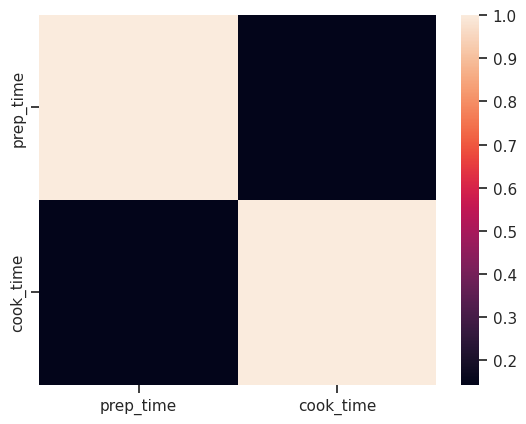

In [ ]:
#5. Visualize this correlation analysis using a heatmap.
#A heatmap is the best technique to make this look beautiful and easier to interpret:
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("indian_food.csv")

# Convert flavor_profile to binary (sweet = 0, spicy = 1)
df["flavor_binary"] = df["flavor_profile"].map({"sweet": 0, "spicy": 1})

# Drop NaN values for clean visualization
df = df.dropna(subset=["prep_time", "cook_time", "flavor_binary"])

# Sort by prep_time for better visualization
df = df.sort_values(by="prep_time")

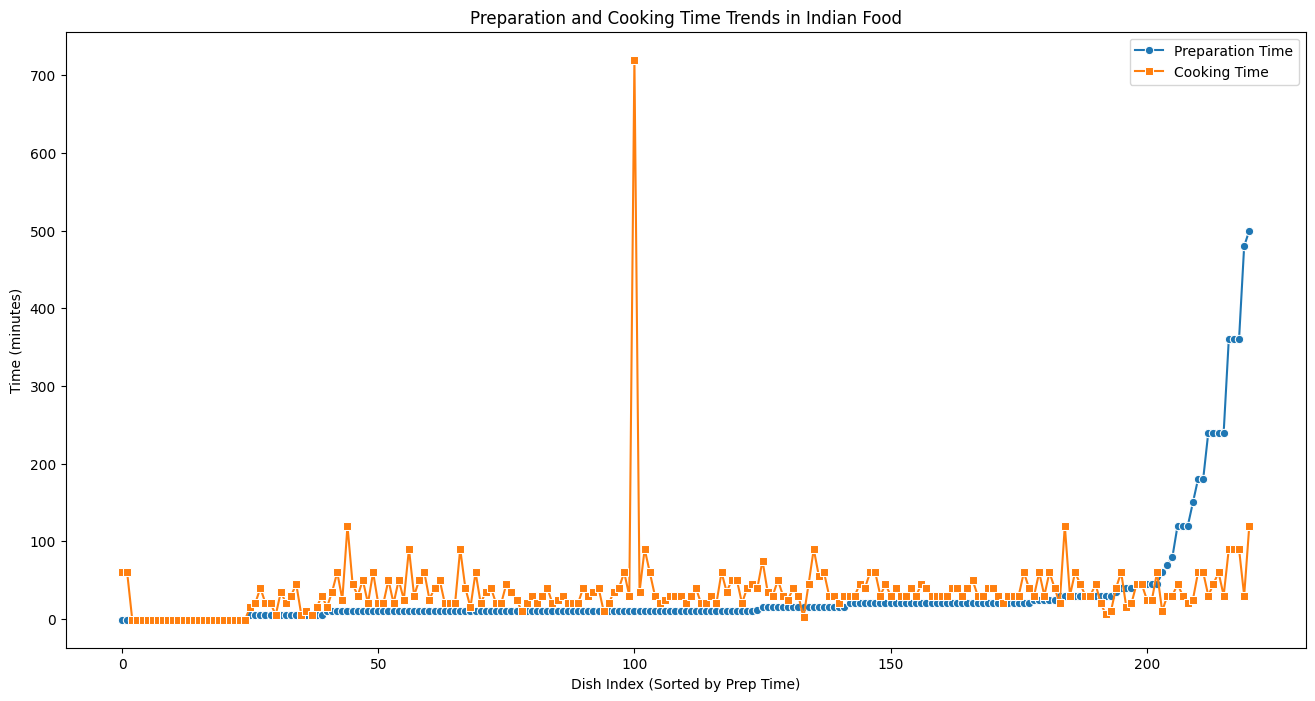

In [ ]:
# Line plot of preparation and cooking times
plt.figure(figsize=(16, 8))
sns.lineplot(x=range(len(df)), y=df["prep_time"], label="Preparation Time", marker="o")
sns.lineplot(x=range(len(df)), y=df["cook_time"], label="Cooking Time", marker="s")
plt.xlabel("Dish Index (Sorted by Prep Time)")
plt.ylabel("Time (minutes)")
plt.title("Preparation and Cooking Time Trends in Indian Food")
plt.legend()
plt.show()

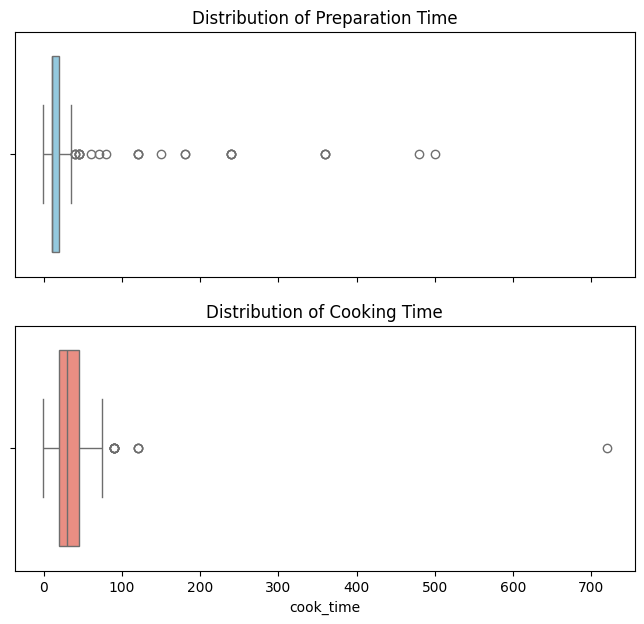

In [ ]:
# Boxplots of preparation and cooking times
fig, axes = plt.subplots(2, 1, figsize=(8, 7), sharex=True)
sns.boxplot(data=df, x="prep_time", ax=axes[0], color="skyblue")
axes[0].set_title("Distribution of Preparation Time")
sns.boxplot(data=df, x="cook_time", ax=axes[1], color="salmon")
axes[1].set_title("Distribution of Cooking Time")
plt.show()

<ipython-input-17-304166c95432>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["flavor_binary"], palette="coolwarm")


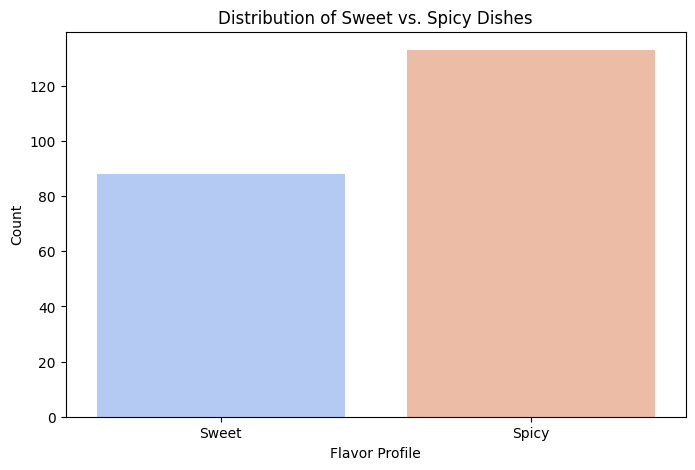

In [ ]:

# Distribution of sweet vs. spicy dishes
plt.figure(figsize=(8, 5))
sns.countplot(x=df["flavor_binary"], palette="coolwarm")
plt.xticks(ticks=[0, 1], labels=["Sweet", "Spicy"])
plt.xlabel("Flavor Profile")
plt.ylabel("Count")
plt.title("Distribution of Sweet vs. Spicy Dishes")
plt.show()


<ipython-input-18-a02a2098ba53>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg = df.groupby("Month")["cook_time"].mean()
<ipython-input-18-a02a2098ba53>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette="viridis")


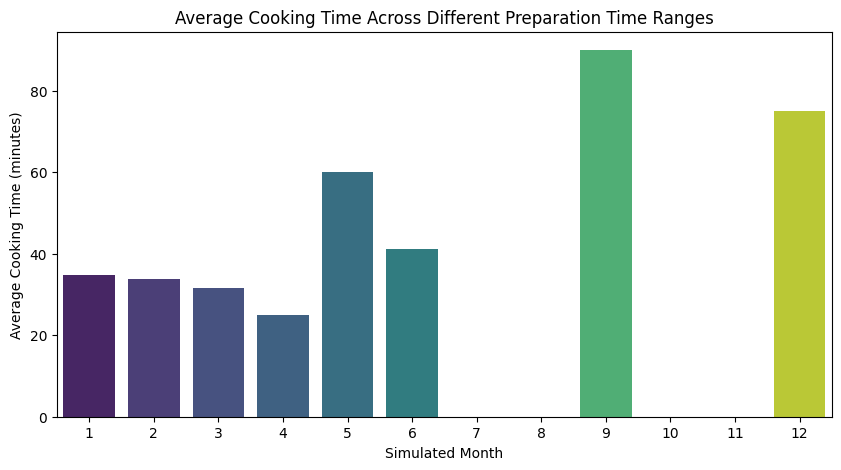

In [ ]:

# Monthly average cooking time (simulating months by dividing prep_time into 12 bins)
df["Month"] = pd.cut(df["prep_time"], bins=12, labels=range(1, 13))
monthly_avg = df.groupby("Month")["cook_time"].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette="viridis")
plt.xlabel("Simulated Month")
plt.ylabel("Average Cooking Time (minutes)")
plt.title("Average Cooking Time Across Different Preparation Time Ranges")
plt.show()

<ipython-input-19-c27109e28117>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="region", y="cook_time", palette="coolwarm")


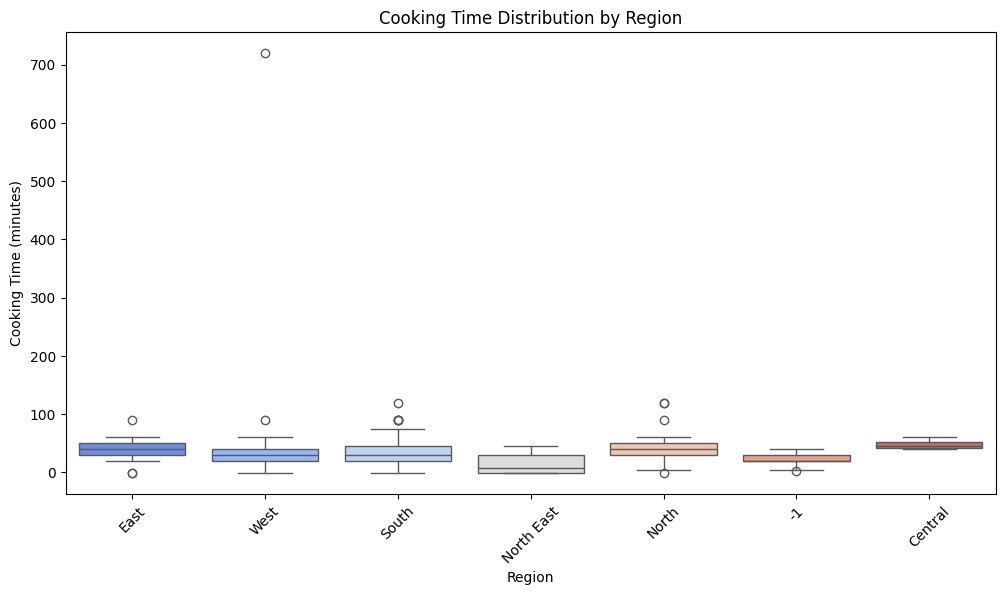

In [ ]:
# Boxplot of cooking time by region
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="region", y="cook_time", palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Region")
plt.ylabel("Cooking Time (minutes)")
plt.title("Cooking Time Distribution by Region")
plt.show()

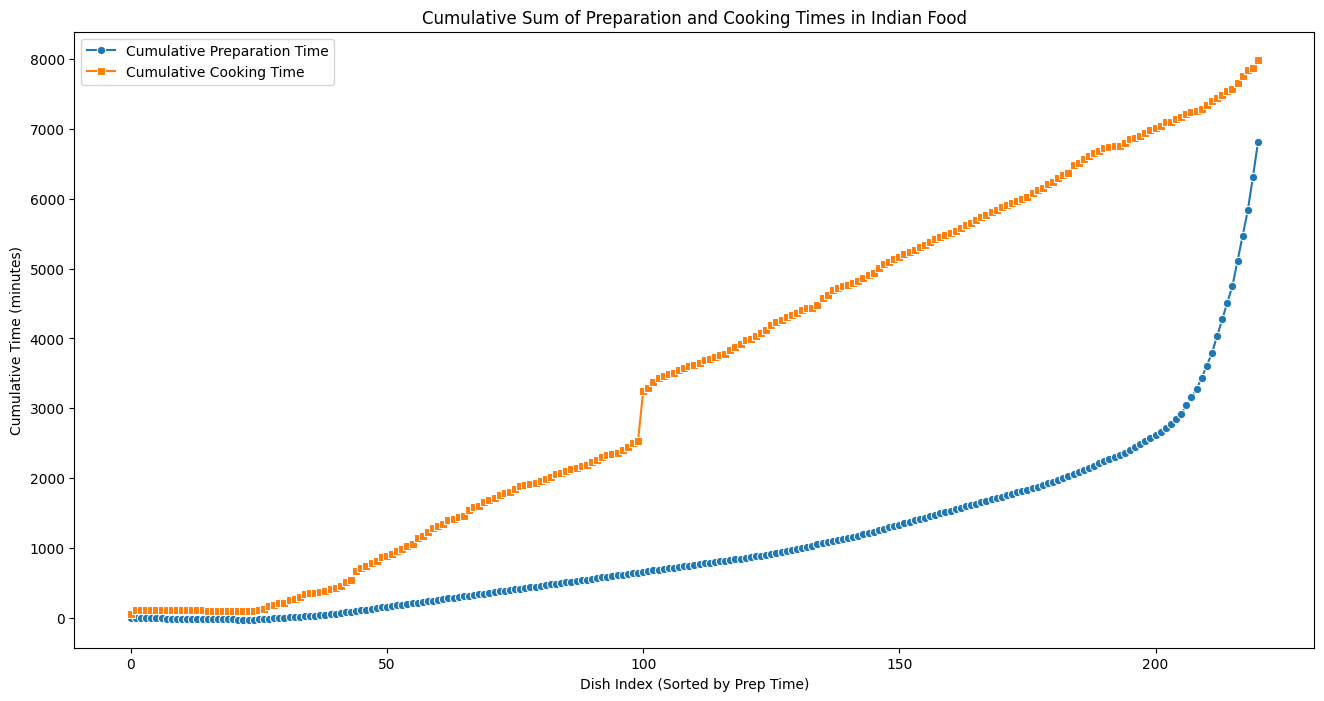

In [ ]:
# Compute cumulative sum of preparation and cooking times
df["cumulative_prep_time"] = df["prep_time"].cumsum()
df["cumulative_cook_time"] = df["cook_time"].cumsum()

# Time series plot of cumulative sum
plt.figure(figsize=(16, 8))
sns.lineplot(x=range(len(df)), y=df["cumulative_prep_time"], label="Cumulative Preparation Time", marker="o")
sns.lineplot(x=range(len(df)), y=df["cumulative_cook_time"], label="Cumulative Cooking Time", marker="s")
plt.xlabel("Dish Index (Sorted by Prep Time)")
plt.ylabel("Cumulative Time (minutes)")
plt.title("Cumulative Sum of Preparation and Cooking Times in Indian Food")
plt.legend()
plt.show()

In [ ]:
# Display basic information about the dataset
print("First 5 rows:")
print(df.head())
print("\nLast 5 rows:")
print(df.tail())

# Show dataset summary
print("\nDataset Info:")
df.info()

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Display basic statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Display index information
print("\nIndex Information:")
print(df.index)

First 5 rows:
               name                                        ingredients  \
21    Chhena kheeri                                Chhena, sugar, milk   
19      Sohan papdi            Gram flour, ghee, sugar, milk, cardamom   
132  Kaara kozhambu  Sesame oil, drumstick, tamarind paste, sambar ...   
65      Pork Bharta   Boiled pork, onions, chillies, ginger and garlic   
234      Hando Guri                                   Jaggery, raisins   

               diet  prep_time  cook_time flavor_profile       course  \
21       vegetarian         -1         60          sweet      dessert   
19       vegetarian         -1         60          sweet      dessert   
132      vegetarian         -1         -1          spicy  main course   
65   non vegetarian         -1         -1          spicy  main course   
234      vegetarian         -1         -1          sweet      dessert   

           state      region  flavor_binary Month  cumulative_prep_time  \
21        Odisha        Eas

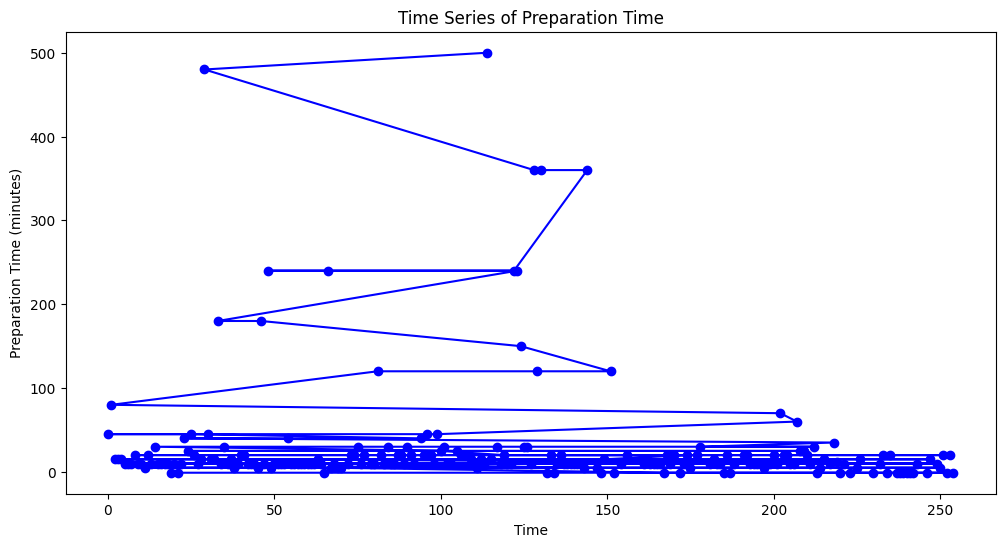

In [ ]:
# Convert index into a time series (assuming dish index represents time order)
df = df.reset_index()
df.rename(columns={'index': 'time'}, inplace=True)

# Generate a time series plot of 'prep_time'
plt.figure(figsize=(12, 6))
plt.plot(df["time"], df["prep_time"], marker='o', linestyle='-', color='b')
plt.xlabel("Time")
plt.ylabel("Preparation Time (minutes)")
plt.title("Time Series of Preparation Time")
plt.show()


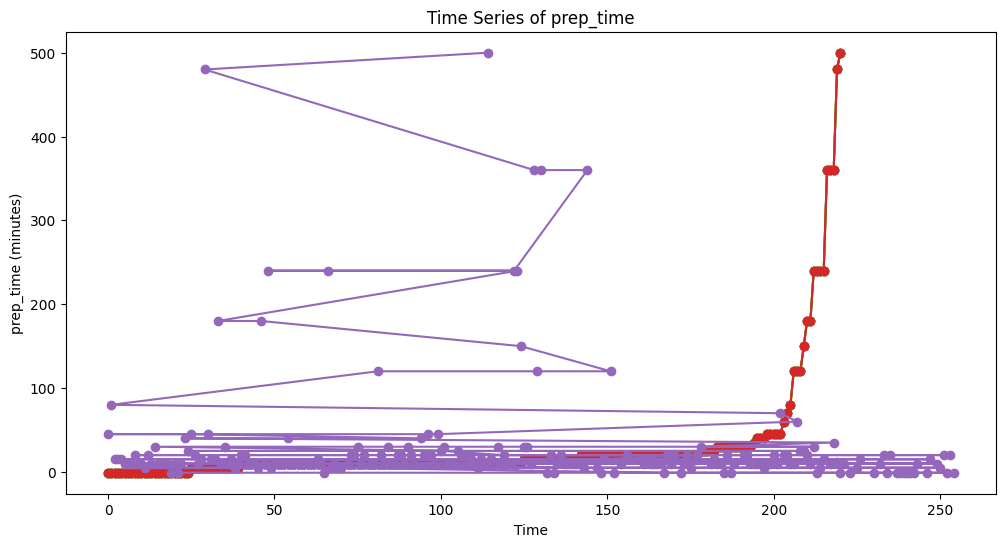

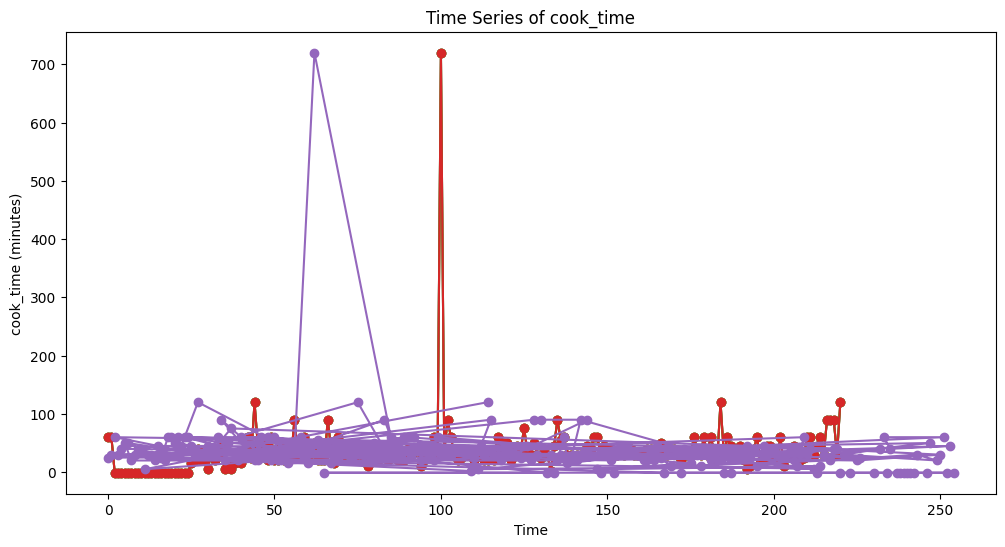

In [ ]:
# Convert index into a time series (assuming dish index represents time order)
df = df.reset_index()
df.rename(columns={'index': 'time'}, inplace=True)

# Generate separate time series plots for each numerical column
for column in ["prep_time", "cook_time"]:
    plt.figure(figsize=(12, 6))
    plt.plot(df["time"], df[column], marker='o', linestyle='-')
    plt.xlabel("Time")
    plt.ylabel(f"{column} (minutes)")
    plt.title(f"Time Series of {column}")
    plt.show()


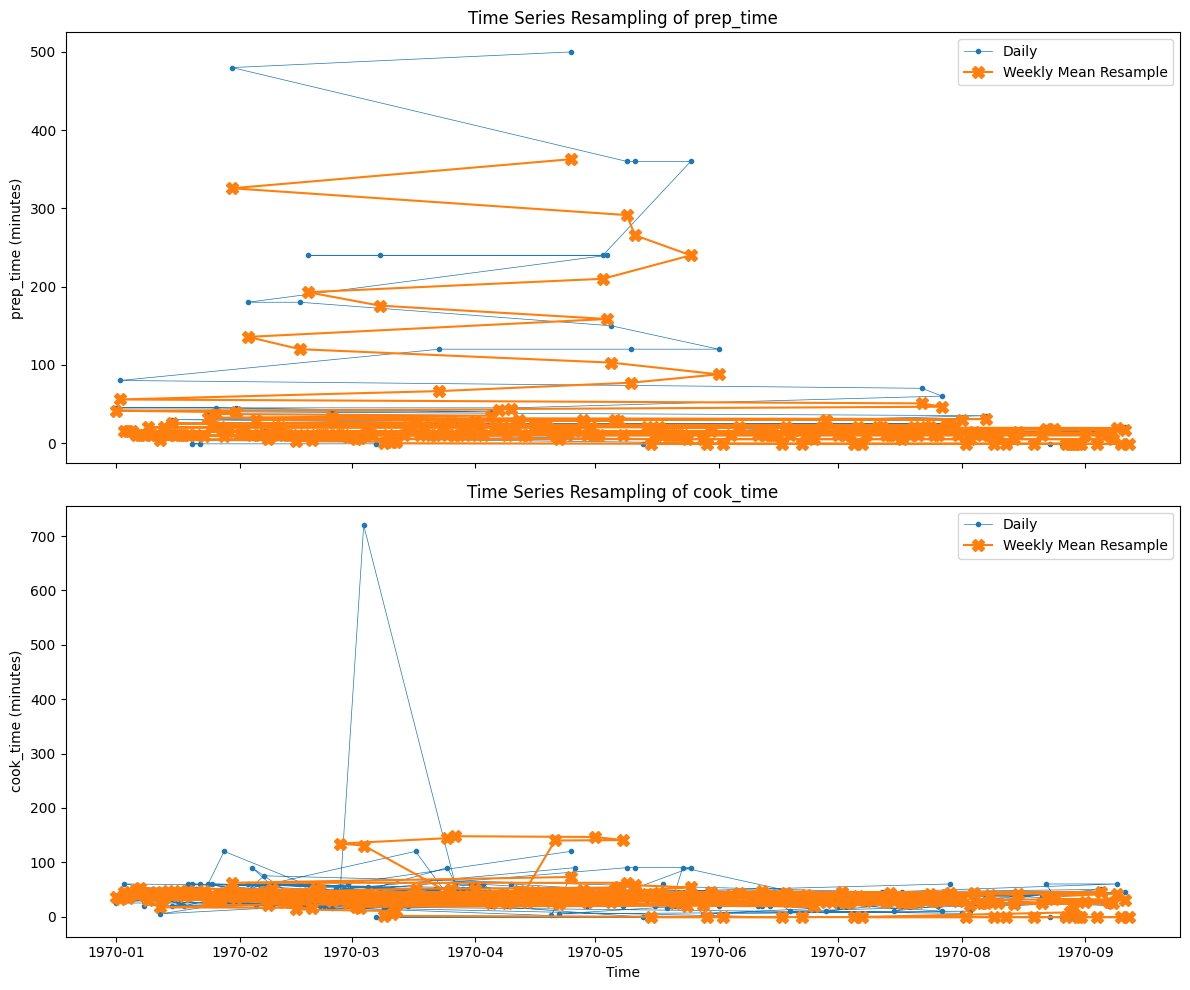

In [ ]:
# Convert index into a time series (assuming dish index represents time order)
df = df.reset_index()
df.rename(columns={'index': 'time'}, inplace=True)

# Resampling time series data (using rolling mean to mimic resampling since no explicit dates)
df['time'] = pd.to_datetime(df['time'], unit='D')  # Convert to datetime for resampling
df.set_index('time', inplace=True)
weekly_mean = df[['prep_time', 'cook_time']].rolling(window=7).mean()

# Plot original vs. resampled data
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
columns = ['prep_time', 'cook_time']

for ax, column in zip(axes, columns):
    ax.plot(df.index, df[column], marker='.', linestyle='-', linewidth=0.5, label='Daily')
    ax.plot(weekly_mean.index, weekly_mean[column], marker='X', markersize=8, linestyle='-', label='Weekly Mean Resample')
    ax.set_ylabel(f"{column} (minutes)")
    ax.set_title(f"Time Series Resampling of {column}")
    ax.legend()

axes[-1].set_xlabel("Time")
plt.tight_layout()
plt.show()

In [ ]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:

# Load the dataset
df = pd.read_csv("/content/indian_food.csv")

# Mean, Median, and Mode calculations
mean_values = df.mean(numeric_only=True)
median_values = df.median(numeric_only=True)
mode_values = df.mode().iloc[0]

print("Mean values:\n", mean_values)
print("Median values:\n", median_values)
print("Mode values:\n", mode_values)

Mean values:
 prep_time    31.105882
cook_time    34.529412
dtype: float64
Median values:
 prep_time    10.0
cook_time    30.0
dtype: float64
Mode values:
 name                                                      Adhirasam
ingredients       Arbi ke patte, sesame seeds, gur, bengal gram ...
diet                                                     vegetarian
prep_time                                                      10.0
cook_time                                                      30.0
flavor_profile                                                spicy
course                                                  main course
state                                                       Gujarat
region                                                         West
Name: 0, dtype: object


In [ ]:

# Skewness Calculation
skewness_values = df[["prep_time", "cook_time"]].apply(skew)
print("Skewness values:\n", skewness_values)

Skewness values:
 prep_time     4.608984
cook_time    11.366064
dtype: float64


In [ ]:

# Kurtosis Calculation
kurtosis_values = df[["prep_time", "cook_time"]].apply(kurtosis)
print("Kurtosis values:\n", kurtosis_values)

Kurtosis values:
 prep_time     22.608075
cook_time    158.009619
dtype: float64


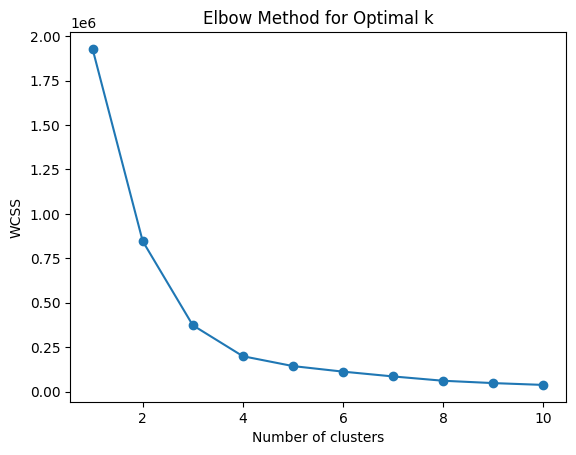

   prep_time  cook_time  Cluster
0         45         25        0
1         80         30        0
2         15         60        0
3         15         30        0
4         15         40        0


In [ ]:

# Clustering using KMeans
X = df[["prep_time", "cook_time"]]

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X)
print(df[['prep_time', 'cook_time', 'Cluster']].head())

       PCA1      PCA2
0 -0.004207  0.275560
1  0.410966  0.543941
2  0.216611 -0.531161
3 -0.223763 -0.090787
4 -0.076971 -0.237578


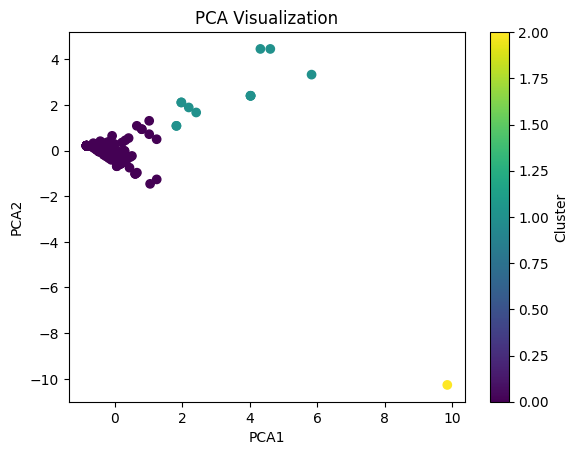

In [ ]:

# PCA for dimensionality reduction
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[["prep_time", "cook_time"]])

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

print(df[['PCA1', 'PCA2']].head())

plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster'], cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA Visualization')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv("indian_food.csv")

In [ ]:
# Display basic information about the dataset
print(df.info())
print(df.head())
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          255 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB
None
             name                                        ingredients  \
0      Balu shahi                    Maida flour, yogurt, oil, sugar   
1          Boondi                            Gram flour, ghee, sugar   
2  Gajar ka halwa       Carrots, milk, sugar, ghee, cashews, raisins   
3          Ghevar  Flour, ghee, kewra, milk, clarified butter, su...

In [ ]:

# Handling missing values
df.fillna("Unknown", inplace=True)

# Summary statistics of numerical columns
print(df.describe())

        prep_time   cook_time
count  255.000000  255.000000
mean    31.105882   34.529412
std     72.554409   48.265650
min     -1.000000   -1.000000
25%     10.000000   20.000000
50%     10.000000   30.000000
75%     20.000000   40.000000
max    500.000000  720.000000


<ipython-input-7-b3cae68cdd8c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="flavor_profile", data=df, palette="viridis")


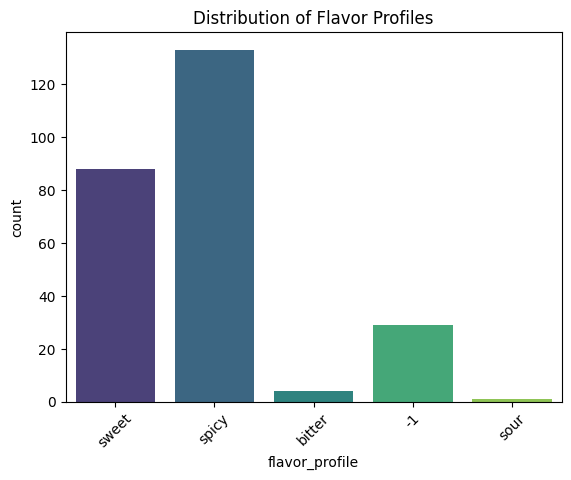

In [ ]:

# Count plot for different flavor profiles
sns.countplot(x="flavor_profile", data=df, palette="viridis")
plt.title("Distribution of Flavor Profiles")
plt.xticks(rotation=45)
plt.show()

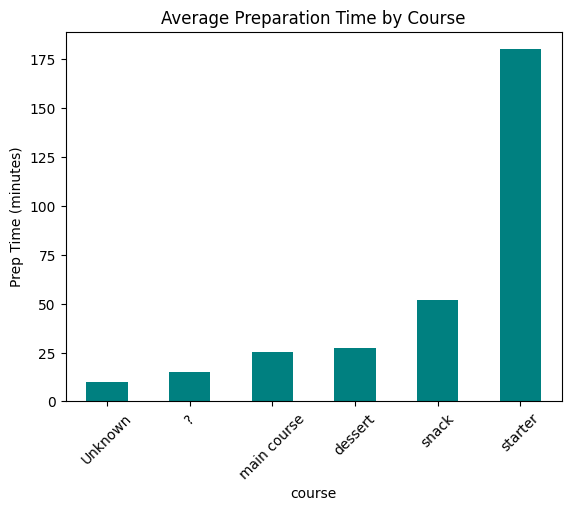

In [ ]:

# Average preparation time per course
avg_prep_time = df.groupby("course")["prep_time"].mean().sort_values()
avg_prep_time.plot(kind="bar", color="teal")
plt.title("Average Preparation Time by Course")
plt.ylabel("Prep Time (minutes)")
plt.xticks(rotation=45)
plt.show()

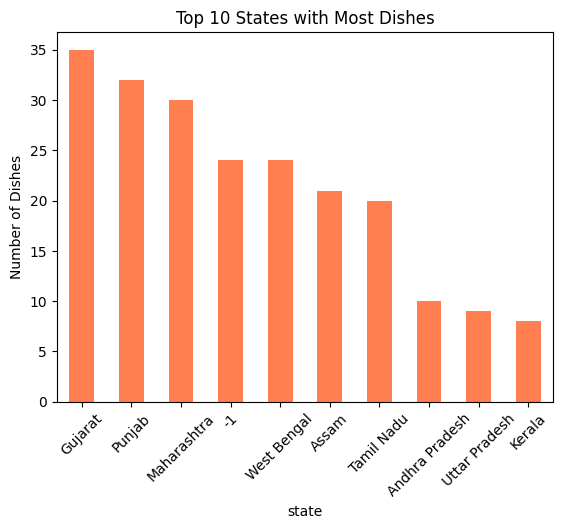

In [ ]:

# Top 10 states with most dishes
top_states = df["state"].value_counts().head(10)
top_states.plot(kind="bar", color="coral")
plt.title("Top 10 States with Most Dishes")
plt.ylabel("Number of Dishes")
plt.xticks(rotation=45)
plt.show()

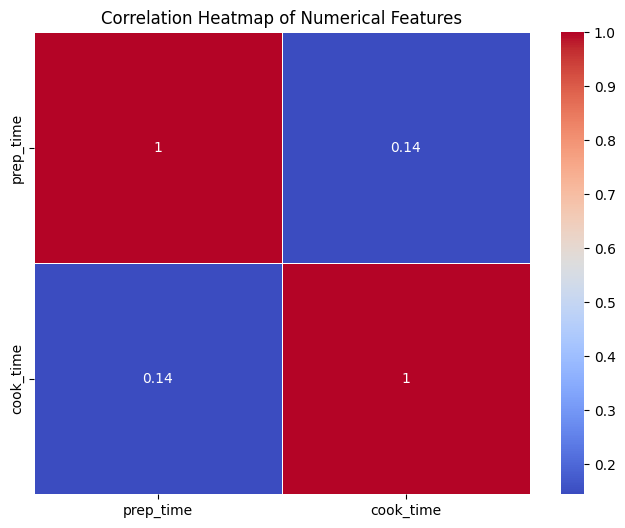

In [ ]:

# Plotting heatmap for numerical features
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


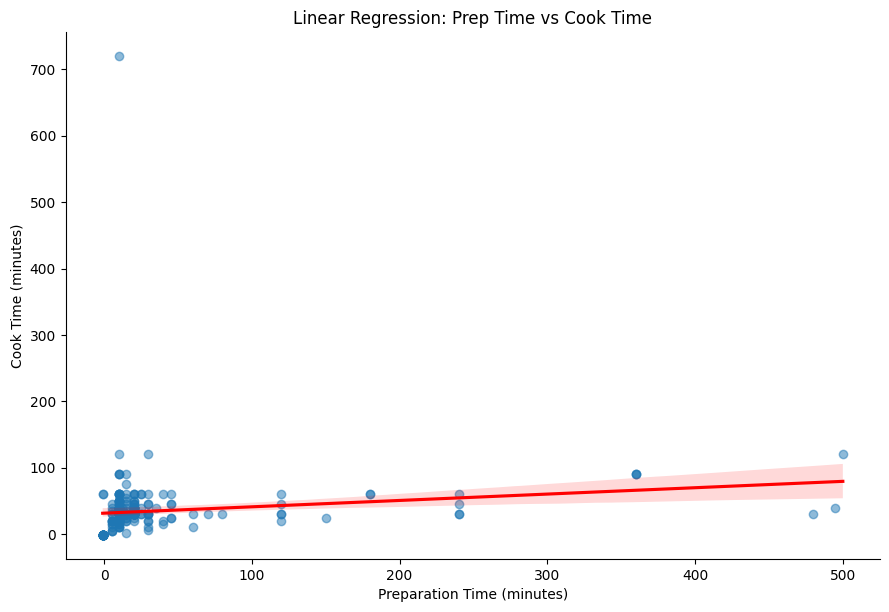

In [ ]:
# Using seaborn's lmplot to visualize the regression line
sns.lmplot(x="prep_time", y="cook_time", data=df, aspect=1.5, height=6, scatter_kws={"alpha":0.5}, line_kws={"color":"red"})
plt.title("Linear Regression: Prep Time vs Cook Time")
plt.xlabel("Preparation Time (minutes)")
plt.ylabel("Cook Time (minutes)")
plt.show()

In [ ]:

# Preparing data for Linear Regression
X = df[["prep_time"]]  # Feature
y = df["cook_time"]  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting cook_time values
y_pred = model.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")
model.score(X_test, y_test)

Mean Absolute Error: 16.989837773999195
Mean Squared Error: 498.30843850328876
R-squared Score: 0.014303473287063162


0.014303473287063162

In [ ]:

# Creating a DataFrame to compare actual vs predicted values
evaluate = pd.DataFrame({"Actual": y_test.values, "Predicted": y_pred})
print(evaluate.head(10))

   Actual  Predicted
0      10  33.721585
1      50  33.721585
2      35  33.721585
3      35  33.721585
4      30  35.515111
5      -1  32.735145
6      30  33.721585
7      -1  32.735145
8      40  33.721585
9      45  36.860256


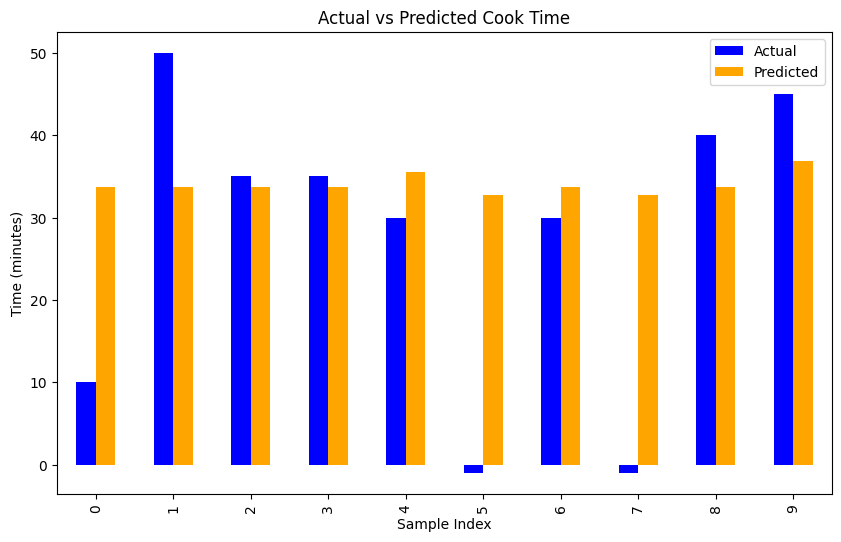

In [ ]:
# Plotting the difference between actual and predicted values
evaluate.head(10).plot(kind='bar', figsize=(10,6), color=["blue", "orange"])
plt.title("Actual vs Predicted Cook Time")
plt.ylabel("Time (minutes)")
plt.xlabel("Sample Index")
plt.legend(["Actual", "Predicted"])
plt.show()